In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [40]:
pima = pd.read_csv("HealthwithcasesDataSet.csv")
pima.head(5)

,Unnamed: 0,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients,Number
0,0,4.9,6.7,880,970,753,529,1027,25663
1,1,4.0,5.0,1056,936,604,488,958,11233
2,2,5.6,6.0,1156,1053,682,692,939,356
3,3,5.5,6.3,1642,1064,658,644,1181,1085
4,4,4.9,6.2,1052,733,421,446,753,1167


In [41]:
pima=pima.drop(['Unnamed: 0'],axis=1)

In [53]:
feature_cols = ['People with two or more chronic conditions','Use type II diabetes','Chronic disease - COPD and Asthma - Patients / Clients','Chronic disease - Heart failure - Patients / Clients','Chronic disease - Diabetes - Patients / Clients','Chronic disease - Rheumatism - Patients / Clients','Chronic disease - Cancer - Patients / Clients']
X = pima[feature_cols] # Features
#targets2 = np.where(pima['Number'] > 
                  # pima['Number'].median(), 1, 0)
#pima['Number']=targets2

y = pima.Number # Target variable
X.head()

#highly afffected muninipalities based on median number of ca

,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients
0,4.9,6.7,880,970,753,529,1027
1,4.0,5.0,1056,936,604,488,958
2,5.6,6.0,1156,1053,682,692,939
3,5.5,6.3,1642,1064,658,644,1181
4,4.9,6.2,1052,733,421,446,753


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test|

In [6]:
y_test

341    1
159    0
91     0
192    0
105    1
325    0
331    0
111    1
186    1
287    0
112    0
213    0
340    0
295    1
231    0
11     1
221    0
89     1
260    0
107    1
117    1
85     1
90     0
272    0
299    0
123    0
4      0
13     1
261    0
352    1
      ..
342    1
273    0
127    1
251    1
18     1
326    0
106    1
73     0
169    0
92     1
229    1
65     1
154    0
167    1
161    1
5      0
188    1
27     0
147    1
139    1
67     1
227    0
206    1
346    1
310    0
59     1
12     0
131    0
293    0
354    1
Name: Number, Length: 71, dtype: int32

In [7]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5774647887323944


In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\20195478\python\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


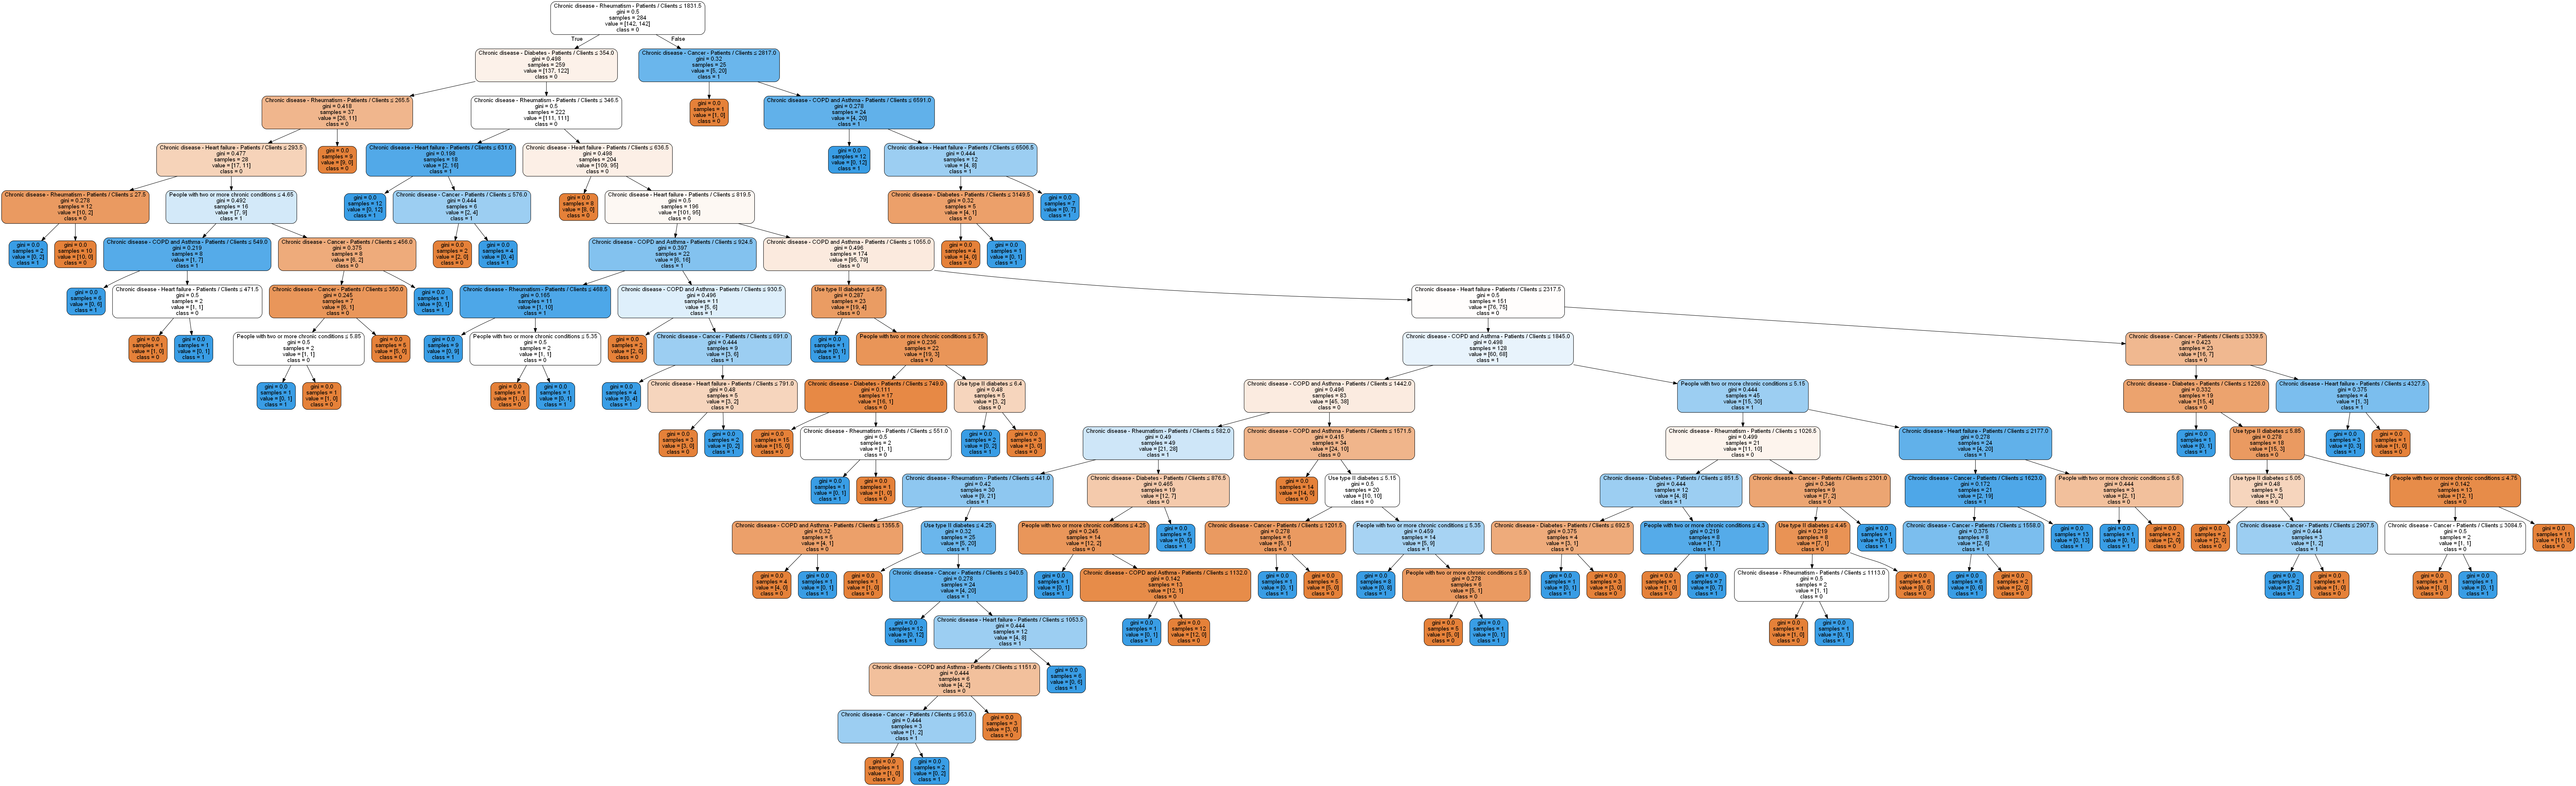

In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('health.png')
Image(graph.create_png())

In [18]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5070422535211268


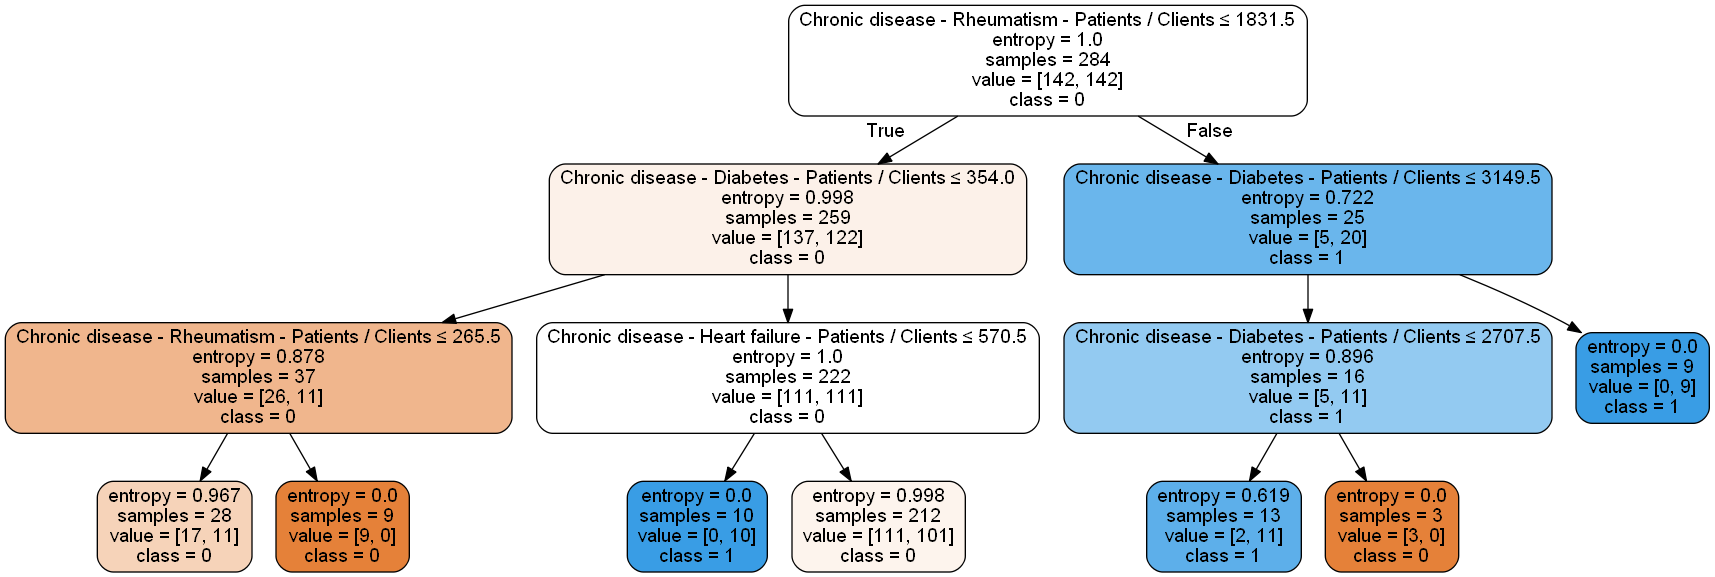

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Random Forest

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
# Random forest
# Model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
rf = RandomForestRegressor(n_estimators=1000,
                           max_depth = 8,
                           max_features = 'sqrt',
                           min_samples_leaf=4,
                           min_samples_split = 10,
                           n_jobs=-1,
                           oob_score=True)
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: %f" % (rmse))
# Feature Importance
columns = X.columns
for feature in zip (columns, rf.feature_importances_):
    print(feature)
# XGBoost
# Model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
model = XGBRegressor(objective = 'reg:linear',
                     learning_rate = 0.01,
                     n_estimators = 1000,
                     max_depth =5,
                     subsample = 0.5,
                     colsample_bytree = 0.3,
                     reg_lambda = 10)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: %f" % (rmse))
# Feature Importance
columns = X.columns
for feature in zip (columns, model.feature_importances_):
    print(feature)

#Decision tree models for regression :)

RMSE: 5834.176100
('People with two or more chronic conditions', 0.1637080019342032)
('Use type II diabetes', 0.12486708930629326)
('Chronic disease - COPD and Asthma - Patients / Clients', 0.13164634775091766)
('Chronic disease - Heart failure - Patients / Clients', 0.1559397952468731)
('Chronic disease - Diabetes - Patients / Clients', 0.1307566008350575)
('Chronic disease - Rheumatism - Patients / Clients', 0.13446610136511675)
('Chronic disease - Cancer - Patients / Clients', 0.15861606356153865)
[13:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 5877.475065
('People with two or more chronic conditions', 0.16795844)
('Use type II diabetes', 0.1360363)
('Chronic disease - COPD and Asthma - Patients / Clients', 0.1317935)
('Chronic disease - Heart failure - Patients / Clients', 0.14122494)
('Chronic disease - Diabetes - Patients / Clients', 0.13078897)
(

# 1. Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data, as we see in the Pima dataset. This can be used via the f_classif() function. We will select the 4 best features using this method in the example below.


In [44]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(X.columns)
print(features[0:5,:])


[1.874 1.731 3.072 3.42  2.958 3.316 5.11 ]
Index(['People with two or more chronic conditions', 'Use type II diabetes',
       'Chronic disease - COPD and Asthma - Patients / Clients',
       'Chronic disease - Heart failure - Patients / Clients',
       'Chronic disease - Diabetes - Patients / Clients',
       'Chronic disease - Rheumatism - Patients / Clients',
       'Chronic disease - Cancer - Patients / Clients'],
      dtype='object')
[[ 880.  970.  529. 1027.]
 [1056.  936.  488.  958.]
 [1156. 1053.  692.  939.]
 [1642. 1064.  644. 1181.]
 [1052.  733.  446.  753.]]


# 2. Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the RFE class in the scikit-learn documentation.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [45]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\20195478\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\20195478\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Num Features: 4
Selected Features: [False False  True  True  True False  True]
Feature Ranking: [4 3 1 1 1 2 1]


C:\Users\20195478\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 3. Principal Component Analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 3 principal components.

Learn more about the PCA class in scikit-learn by reviewing the PCA API. Dive deeper into the math behind PCA on the Principal Component Analysis Wikipedia article.

In [56]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# feature extraction

pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)
X.columns

Explained Variance: [0.988 0.007 0.003]
[[-1.105e-05  1.529e-05  6.157e-01  4.675e-01  2.454e-01  2.247e-01
   5.400e-01]
 [ 5.059e-04  8.991e-04 -7.595e-01  1.937e-01  1.774e-01  6.194e-02
   5.919e-01]
 [-4.808e-04 -4.268e-04  2.046e-01 -7.093e-01 -2.119e-01 -2.598e-01
   5.853e-01]]


Index(['People with two or more chronic conditions', 'Use type II diabetes',
       'Chronic disease - COPD and Asthma - Patients / Clients',
       'Chronic disease - Heart failure - Patients / Clients',
       'Chronic disease - Diabetes - Patients / Clients',
       'Chronic disease - Rheumatism - Patients / Clients',
       'Chronic disease - Cancer - Patients / Clients'],
      dtype='object')